In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
demograpgics = pd.read_csv('datasets/exam-1/demographics.csv')

cc = pd.read_csv('datasets/exam-1/cc.csv')
cc['month'] = pd.to_datetime(cc['pos_dt']).dt.month

kplus = pd.read_csv('datasets/exam-1/kplus.csv')
kplus['month'] = pd.to_datetime(kplus['sunday']).dt.month

train_set = pd.read_csv('datasets/exam-1/train.csv')

In [3]:
demograpgics.head()

,id,cc_no,gender,ocp_cd,age
0,1,1,2,9.0,5
1,1,98397,2,9.0,5
2,2,2,2,3.0,4
3,2,9740,2,3.0,4
4,3,3,2,1.0,3


In [4]:
cc.head()

,cc_no,pos_dt,cc_txn_amt,month
0,37069,2018-05-10,5000,5
1,37069,2018-06-04,12000,6
2,37069,2018-04-03,5000,4
3,37069,2018-04-22,1600,4
4,37069,2018-01-21,5000,1


In [5]:
kplus.head()

,id,sunday,kp_txn_count,kp_txn_amt,month
0,14802,2018-01-14,2,2400,1
1,14802,2018-04-01,9,33900,4
2,14802,2018-05-27,7,6100,5
3,14802,2018-01-28,3,8500,1
4,14802,2018-03-25,2,4000,3


In [6]:
train_set.head()

,id,income
0,1,20000
1,2,106000
2,3,29000
3,4,61000
4,5,18000


In [7]:
ocp_salary = demograpgics[['id', 'ocp_cd']].drop_duplicates()

In [8]:
ocp_salary = ocp_salary.set_index('id').join(train_set.set_index('id'))

In [9]:
ocp_salary.head()

,ocp_cd,income
id,,
1,9.0,20000.0
2,3.0,106000.0
3,1.0,29000.0
4,3.0,61000.0
5,9.0,18000.0


In [10]:
grouped = ocp_salary.groupby('ocp_cd')

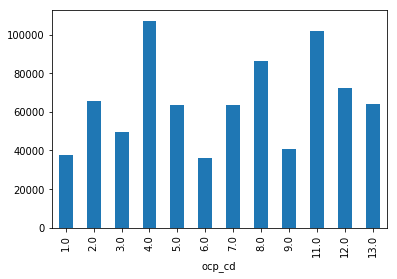

In [11]:
grouped.mean()['income'].plot.bar()

In [12]:
grouped_kplus_by_month = kplus.groupby(['id','month']).sum()
grouped_kplus_by_month.reset_index(inplace=True)
grouped_kplus_by_month


,id,month,kp_txn_count,kp_txn_amt
0,1,6,2,3500
1,2,1,13,7400
2,2,2,15,19600
3,2,3,14,23500
4,2,4,27,63400
5,2,5,19,24900
6,2,6,16,71200
7,3,1,11,15800
8,3,2,8,14700
9,3,3,10,20200


In [13]:
grouped_cc_by_month = cc.groupby(['cc_no', 'month']).sum()
grouped_cc_by_month.reset_index(inplace=True)
grouped_cc_by_month

,cc_no,month,cc_txn_amt
0,2,3,4600
1,2,4,18700
2,2,5,1600
3,2,6,2000
4,4,5,300000
5,4,6,240000
6,5,1,7000
7,5,2,5000
8,6,6,32000
9,7,1,900


In [14]:
joined_demo_cc = demograpgics.set_index('cc_no').join(grouped_cc_by_month.set_index('cc_no'))
joined_demo_cc.reset_index(inplace=True)

joined_demo_cc

,cc_no,id,gender,ocp_cd,age,month,cc_txn_amt
0,1,1,2,9.0,5,NaN,NaN
1,2,2,2,3.0,4,3.0,4600.0
2,2,2,2,3.0,4,4.0,18700.0
3,2,2,2,3.0,4,5.0,1600.0
4,2,2,2,3.0,4,6.0,2000.0
5,3,3,2,1.0,3,NaN,NaN
6,4,4,2,3.0,5,5.0,300000.0
7,4,4,2,3.0,5,6.0,240000.0
8,5,5,2,9.0,4,1.0,7000.0
9,5,5,2,9.0,4,2.0,5000.0


In [15]:
joined_all = joined_demo_cc.set_index(['id','month']).join(grouped_kplus_by_month.set_index(['id', 'month']))
joined_all['kp_txn_amt'] = joined_all['kp_txn_amt'].fillna(0)
joined_all['cc_txn_amt'] = joined_all['cc_txn_amt'].fillna(0)
joined_all['expenses'] = joined_all['kp_txn_amt'] + joined_all['cc_txn_amt']
joined_all.reset_index(inplace=True)

# Drop row that not contain any expenses
joined_all.dropna(subset=['month'], inplace=True)

joined_all['month'] = joined_all['month'].astype('int')
joined_all

,id,month,cc_no,gender,ocp_cd,age,cc_txn_amt,kp_txn_count,kp_txn_amt,expenses
1,1,1,98397,2,9.0,5,4700.0,NaN,0.0,4700.0
2,1,2,98397,2,9.0,5,20000.0,NaN,0.0,20000.0
3,1,5,98397,2,9.0,5,10000.0,NaN,0.0,10000.0
4,1,6,98397,2,9.0,5,10000.0,2.0,3500.0,13500.0
5,2,1,9740,2,3.0,4,6600.0,13.0,7400.0,14000.0
6,2,2,9740,2,3.0,4,5700.0,15.0,19600.0,25300.0
7,2,3,2,2,3.0,4,4600.0,14.0,23500.0,28100.0
8,2,3,9740,2,3.0,4,4100.0,14.0,23500.0,27600.0
9,2,4,2,2,3.0,4,18700.0,27.0,63400.0,82100.0
10,2,4,9740,2,3.0,4,11700.0,27.0,63400.0,75100.0


In [16]:
mean_expenses = joined_all[['id', 'ocp_cd' ,'expenses', 'gender', 'age']].groupby('id').mean()
mean_expenses.dropna(inplace=True)
mean_expenses['ocp_cd'] = mean_expenses['ocp_cd'].astype('int')
mean_expenses

,ocp_cd,expenses,gender,age
id,,,,
1,9,1.205000e+04,2,5
2,3,4.814444e+04,2,4
4,3,1.405033e+06,2,5
5,9,6.000000e+03,2,4
6,3,4.540000e+04,1,3
7,3,1.040583e+05,1,5
8,9,1.368500e+05,2,3
9,9,5.271429e+03,1,4
11,9,9.764000e+04,1,4


In [17]:
joined_expesnse_income = mean_expenses.join(train_set.set_index('id'))
joined_expesnse_income.dropna(inplace=True)
joined_expesnse_income['expenses_percentage'] = joined_expesnse_income['expenses'] / joined_expesnse_income['income']
joined_expesnse_income

,ocp_cd,expenses,gender,age,income,expenses_percentage
id,,,,,,
1,9,1.205000e+04,2,5,20000.0,0.602500
2,3,4.814444e+04,2,4,106000.0,0.454193
4,3,1.405033e+06,2,5,61000.0,23.033333
5,9,6.000000e+03,2,4,18000.0,0.333333
6,3,4.540000e+04,1,3,19000.0,2.389474
7,3,1.040583e+05,1,5,53000.0,1.963365
8,9,1.368500e+05,2,3,16000.0,8.553125
9,9,5.271429e+03,1,4,19000.0,0.277444
11,9,9.764000e+04,1,4,28000.0,3.487143


In [18]:
# remove over spend (outlier)
joined_expesnse_income.drop(joined_expesnse_income[joined_expesnse_income['expenses_percentage'] > 1].index, inplace=True)

In [19]:
mean_expenses_percentage_by_ocp_cd = joined_expesnse_income.groupby('ocp_cd').mean()
mean_expenses_percentage_by_ocp_cd

,expenses,gender,age,income,expenses_percentage
ocp_cd,,,,,
1,18375.939361,1.713881,4.104816,43410.764873,0.468314
2,33785.373355,1.552941,4.211765,81247.058824,0.428005
3,24529.456914,1.528693,3.922312,57923.658587,0.457585
4,50520.859615,1.395264,4.799636,133107.468124,0.402280
5,23305.291206,1.629630,4.481481,82851.851852,0.355609
6,16467.518939,1.550000,2.850000,41275.000000,0.451106
7,30382.952263,1.522449,4.122449,80314.285714,0.428538
8,35455.428571,1.400000,4.400000,120800.000000,0.343750
9,18098.627082,1.455740,3.904813,45020.880306,0.419147


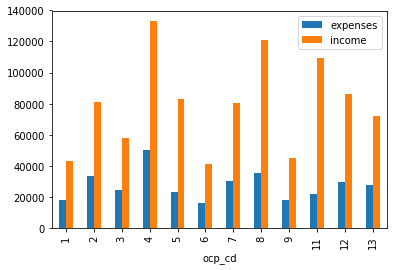

In [20]:
mean_expenses_percentage_by_ocp_cd[['expenses','income']].plot.bar()

In [21]:
X = joined_expesnse_income.reset_index()[['ocp_cd','age', 'gender', 'expenses']]
Y = joined_expesnse_income.reset_index()['income']

one_hot_ocp_cd =  pd.get_dummies(X['ocp_cd'], prefix='ocp_cd')
X = pd.concat([X,one_hot_ocp_cd], axis=1)
X.drop('ocp_cd', axis=1, inplace=True)

In [22]:
X

,age,gender,expenses,ocp_cd_1,ocp_cd_2,ocp_cd_3,ocp_cd_4,ocp_cd_5,ocp_cd_6,ocp_cd_7,ocp_cd_8,ocp_cd_9,ocp_cd_11,ocp_cd_12,ocp_cd_13
0,5,2,12050.000000,0,0,0,0,0,0,0,0,1,0,0,0
1,4,2,48144.444444,0,0,1,0,0,0,0,0,0,0,0,0
2,4,2,6000.000000,0,0,0,0,0,0,0,0,1,0,0,0
3,4,1,5271.428571,0,0,0,0,0,0,0,0,1,0,0,0
4,4,2,4500.000000,0,0,1,0,0,0,0,0,0,0,0,0
5,3,2,11625.000000,0,0,1,0,0,0,0,0,0,0,0,0
6,5,2,8428.571429,0,0,1,0,0,0,0,0,0,0,0,0
7,3,2,3166.666667,0,0,1,0,0,0,0,0,0,0,0,0
8,4,2,9437.500000,0,0,1,0,0,0,0,0,0,0,0,0
9,4,1,5333.333333,0,0,0,0,0,0,0,0,1,0,0,0


In [23]:
Y

0         20000.0
1        106000.0
2         18000.0
3         19000.0
4         31000.0
5         22000.0
6         19000.0
7         26000.0
8         13000.0
9         26000.0
10        11000.0
11        33000.0
12        25000.0
13        12000.0
14        44000.0
15        14000.0
16        15000.0
17        60000.0
18        95000.0
19        18000.0
20        25000.0
21        66000.0
22        29000.0
23        81000.0
24        26000.0
25        20000.0
26        40000.0
27        27000.0
28        21000.0
29        22000.0
           ...   
21547     82000.0
21548     76000.0
21549     44000.0
21550    145000.0
21551     65000.0
21552    173000.0
21553     12000.0
21554     30000.0
21555     39000.0
21556     82000.0
21557     20000.0
21558    104000.0
21559     20000.0
21560     13000.0
21561     14000.0
21562     29000.0
21563    153000.0
21564    238000.0
21565     32000.0
21566     26000.0
21567     36000.0
21568     13000.0
21569     83000.0
21570     48000.0
21571     

In [24]:
from sklearn.preprocessing import StandardScaler
X, Y = np.array(X), np.array(Y).reshape(-1, 1)
scalerX = StandardScaler()
scalerX.fit(X[:,:3])

scalerY = StandardScaler()
scalerY.fit(Y)

X[:,:3], Y = scalerX.transform(X[:,:3]), scalerY.transform(Y)

In [25]:
X[0]

array([ 1.19375451,  1.01423675, -0.32469085,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ])

In [26]:
print(X.shape)
print(Y.shape)

(21577, 15)
(21577, 1)


In [27]:
from util import modified_SMAPE
from keras.models import Model, Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [34]:
model = Sequential()
model.add(Dense(128, input_shape=(15,),activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile('adam', loss='mse')

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               2048      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 17        
Total params: 12,929
Trainable params: 12,929
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X, Y, epochs=200, validation_split=0.3)

Train on 15103 samples, validate on 6474 samples
Epoch 1/200
15103/15103 [==============================] - 1s 64us/step - loss: 0.7100 - val_loss: 0.5516
Epoch 2/200
15103/15103 [==============================] - 1s 39us/step - loss: 0.5410 - val_loss: 0.5339
Epoch 3/200
15103/15103 [==============================] - 1s 39us/step - loss: 0.5358 - val_loss: 0.5427
Epoch 4/200
15103/15103 [==============================] - 1s 39us/step - loss: 0.5247 - val_loss: 0.5226
Epoch 5/200
15103/15103 [==============================] - 1s 39us/step - loss: 0.5215 - val_loss: 0.5229
Epoch 6/200
15103/15103 [==============================] - 1s 39us/step - loss: 0.5188 - val_loss: 0.5120
Epoch 7/200
15103/15103 [==============================] - 1s 40us/step - loss: 0.5163 - val_loss: 0.5152
Epoch 8/200
15103/15103 [==============================] - 1s 39us/step - loss: 0.5119 - val_loss: 0.5125
Epoch 9/200
15103/15103 [==============================] - 1s 39us/step - loss: 0.5123 - val_loss: 0.50

KeyboardInterrupt: 

In [37]:
scalerY.inverse_transform(model.predict(X[:10]))

array([[38371.57 ],
       [87144.75 ],
       [29769.336],
       [33351.215],
       [31913.27 ],
       [32147.88 ],
       [41576.438],
       [28470.406],
       [35011.902],
       [33389.32 ]], dtype=float32)

In [38]:
scalerY.inverse_transform(Y[:10])

array([[ 20000.],
       [106000.],
       [ 18000.],
       [ 19000.],
       [ 31000.],
       [ 22000.],
       [ 19000.],
       [ 26000.],
       [ 13000.],
       [ 26000.]])

In [39]:
modified_SMAPE(scalerY.inverse_transform(model.predict(X)).reshape(-1), scalerY.inverse_transform(Y).reshape(-1))

88.16893437662594